In [2]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.preprocessing.image import load_img , img_to_array
from keras.layers import Dropout, Conv2D , MaxPooling2D , UpSampling2D
from keras.models import Sequential

In [3]:
import os

In [4]:
dataset_dir=r"D:\ML Dataset\kagglecatsanddogs_3367a\PetImages"

In [74]:
images=[]
labels=[]
category=os.listdir(dataset_dir)
for label,classes in enumerate(os.listdir(dataset_dir)):
    class_name=os.path.join(dataset_dir,classes)
    for i in os.listdir(class_name)[:400]:
        try:
            img=load_img(os.path.join(class_name,i),target_size=(32,32))
            images.append(img_to_array(img)/255)
            labels.append(label)
        except Exception as e:
            print(f"Error in path {os.path.join(class_name,i)}")

    
    

In [75]:
dataset = [[images[i],labels[i]] for i in range(len(labels))]

In [76]:
np.random.shuffle(dataset)

In [30]:
from sklearn.model_selection import train_test_split

In [77]:
x=[]
y=[]
for i in dataset:
    x.append(np.array(i[0]))
    y.append(i[1])

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [79]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [80]:
model = Sequential()

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()


model.add(Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))


model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))


model.add(Conv2D(3, (3, 3), activation="sigmoid", padding="same"))


In [89]:
model.compile(metrics=["accuracy"],loss="binary_crossentropy",optimizer="adam")

In [90]:
history=model.fit(x_train,x_train,epochs=10,batch_size=32)

Epoch 1/10
20/20 [==============================] - 12s 594ms/step - loss: 0.6896 - accuracy: 0.6413
Epoch 2/10
20/20 [==============================] - 12s 606ms/step - loss: 0.6857 - accuracy: 0.6577
Epoch 3/10
20/20 [==============================] - 12s 599ms/step - loss: 0.6689 - accuracy: 0.6562
Epoch 4/10
20/20 [==============================] - 12s 594ms/step - loss: 0.6436 - accuracy: 0.6555
Epoch 5/10
20/20 [==============================] - 12s 600ms/step - loss: 0.6292 - accuracy: 0.6564
Epoch 6/10
20/20 [==============================] - 12s 593ms/step - loss: 0.6245 - accuracy: 0.6543
Epoch 7/10
20/20 [==============================] - 12s 594ms/step - loss: 0.6201 - accuracy: 0.6553
Epoch 8/10
20/20 [==============================] - 12s 597ms/step - loss: 0.6187 - accuracy: 0.6528
Epoch 9/10
20/20 [==============================] - 12s 602ms/step - loss: 0.6164 - accuracy: 0.6541
Epoch 10/10
20/20 [==============================] - 12s 605ms/step - loss: 0.6142 - accura

In [91]:
predictions=model.predict(x_test)

In [63]:
import matplotlib.pyplot as plt

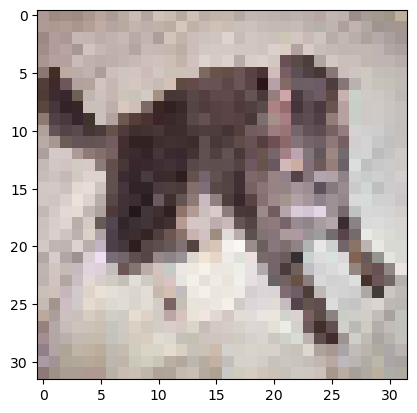

In [92]:
plt.imshow(x_test[0])

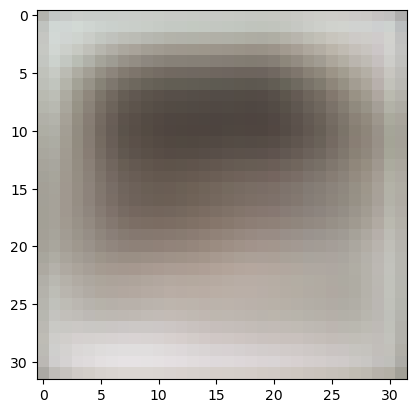

In [93]:
plt.imshow(predictions[0])

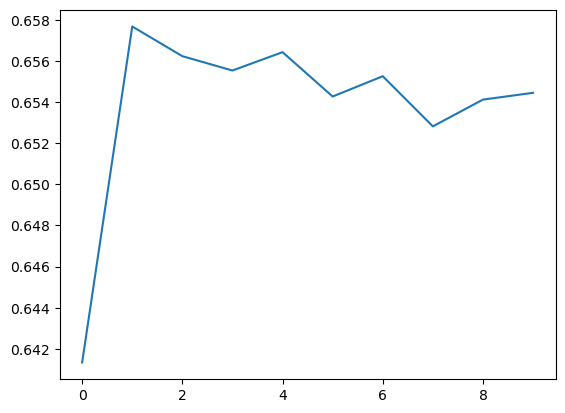

In [94]:
plt.plot(history.history["accuracy"])

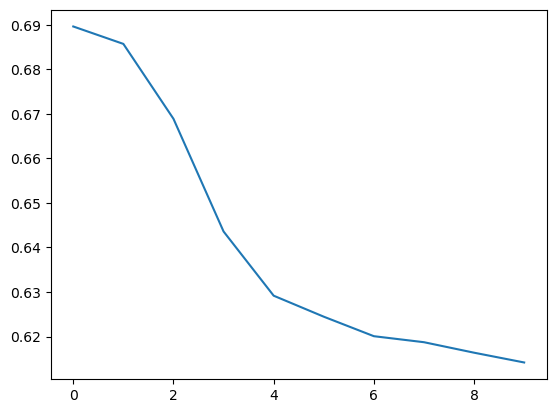

In [95]:
plt.plot(history.history["loss"])